In [5]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#Load Data
df = pd.read_csv('netflix_titles.csv')

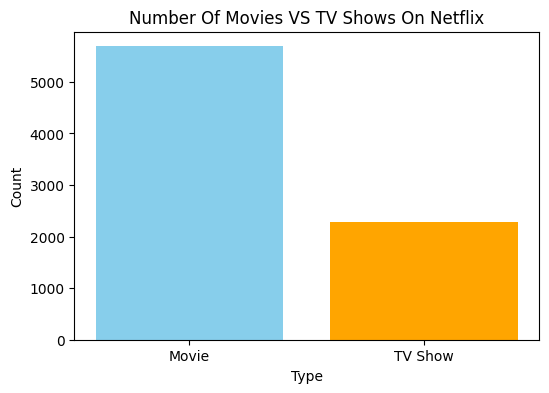

In [7]:
#Cleaning the Data
df = df.dropna(subset=['type','release_year','rating','country','duration'])

type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue','orange'])
plt.title('Number Of Movies VS TV Shows On Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout
plt.savefig('movies_vs_tvshows.png')
plt.show()

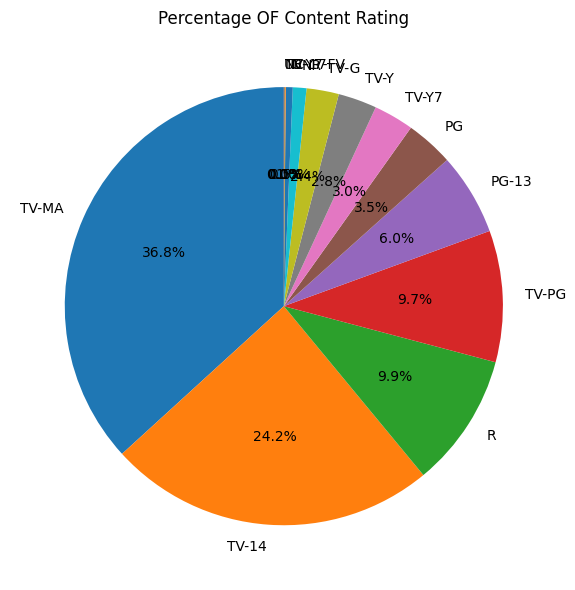

In [8]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%',startangle=90)
plt.title('Percentage OF Content Rating')
plt.tight_layout()
plt.savefig('Content_rating.png')
plt.show()

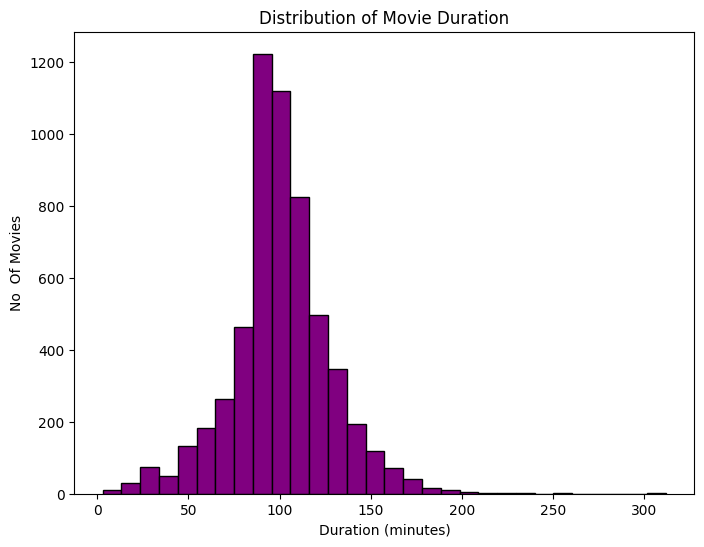

In [9]:
movie_df = df[df['type']=='Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('No  Of Movies')
plt.tight_layout
plt.savefig('movie_duration_hist.png')
plt.show()

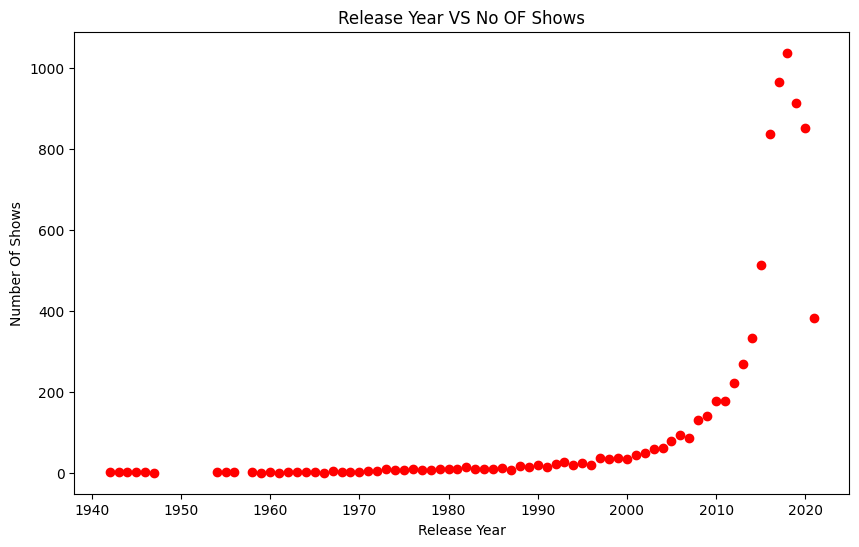

In [10]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Year VS No OF Shows')
plt.xlabel('Release Year')
plt.ylabel('Number Of Shows')
plt.tight_layout
plt.savefig('release_year_scatter.png')
plt.show()

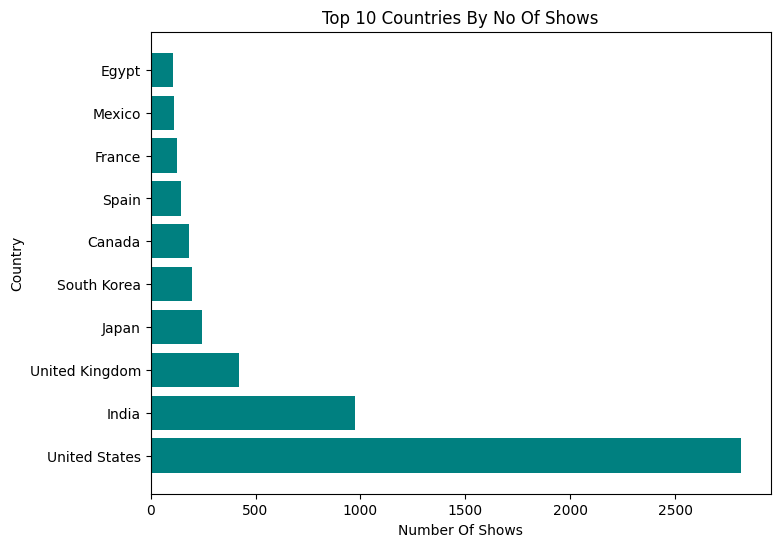

In [11]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries By No Of Shows')
plt.xlabel('Number Of Shows')
plt.ylabel('Country')
plt.tight_layout
plt.savefig('top_10_country.png')
plt.show()

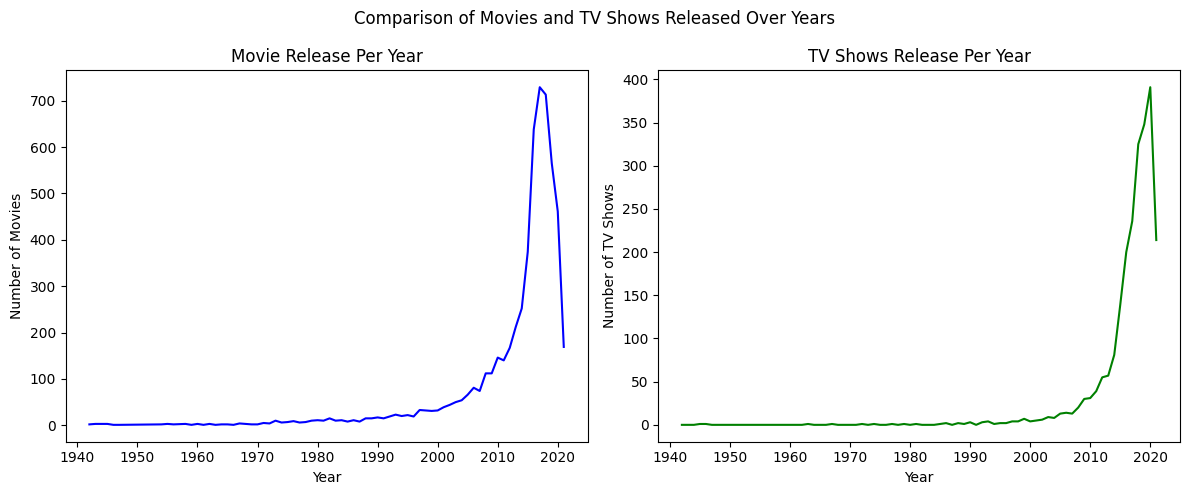

In [20]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2, figsize=(12,5))

#first subplot:movie
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movie Release Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot:TV shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='green')
ax[1].set_title('TV Shows Release Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()